In [1]:
# https://www.qmunity.tech/tutorials

In [2]:
import numpy as np
import math
from math import sqrt
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit import BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import transpile

## Step One : Preparation

In [3]:
def preparation(qc):
    qc.h(0)
    qc.cx(0,1)


## Step Two : Separation

In [4]:
def seperation(qc):
    qc.barrier()

## Step Three : Encoding

In [5]:
## Sender can manipulate h(is/er) part of entangled qubits to encode 2 bits of classical information
def state_00(qc):
    pass

def state_01(qc):
    qc.x(0)

def state_10(qc):
    qc.z(0)
    
def state_11(qc):
    qc.x(0)
    qc.z(0)

def encoding(qc):
    message = input('Enter your intended message from 00, 01, 10 and 11 :   ')
    if message == '00':
        state_00(qc)
    elif message == '01':
        state_01(qc)
    elif message == '10':
        state_10(qc)
    elif message == '11':
        state_11(qc)
    else:
        print('Invalid message: Sending 00')

## Step Four : Transmission

In [6]:
def transmission(qc):
    qc.barrier()

## Step Five : Decoding

In [7]:
## Receiver bell-measures their qubits to retreive the encoded classical bits information:

def bell_measure(qc):
    qc.cx(0,1)
    qc.h(0)
    qc.measure(range(2),range(2))
    display(qc.draw('mpl'))
## Retrieving Information:
    backend_sim = Aer.get_backend('statevector_simulator')
#     backend_real_qc = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= 2
#                                           and not x.configuration().simulator
#                                           and x.status().operational == True))
#     print("Running on: ", backend_real_qc)
#     job = execute(qc,backend_real_qc)
    job = execute(qc,backend_sim)
    result = job.result()
    counts = result.get_counts(qc)
    received = dict([(value,key) for key,value in counts.items()])
    print('Message received: {} '.format(received[1]))
    display(plot_histogram(counts))

## The Complete Protocol in a Simulator

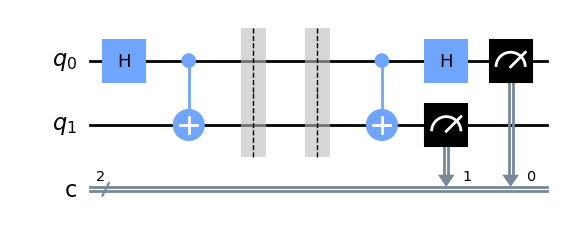

Message received: 00 


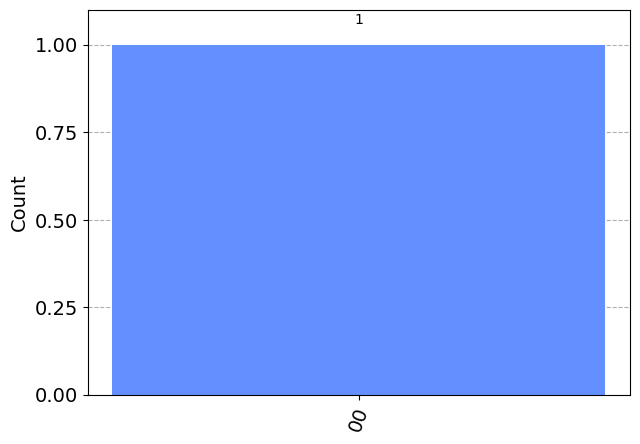

In [8]:
## Initializing:
qc_test = QuantumCircuit(2,2)

## Preparing entangled state:
preparation(qc_test)

## Sender Receiver moves apart:
seperation(qc_test)

## Sender encodes h(is/er) qubit according to intended 2 bits of classical information:
encoding(qc_test)

## Sender transmits h(is/er) encoded qubit physically to receiver:
transmission(qc_test)

# Receiver performs bell-measurement on both qubits to retrieve the encoded 2 bits of information:
bell_measure(qc_test)